In [1]:
import pandas, nltk, string, numpy, csv
from pattern.fr import parse, split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import linalg
from sklearn.cluster import KMeans
import collections
from pprint import pprint
%matplotlib inline

In [2]:
from langdetect import detect

In [3]:
stop_word = pandas.read_excel('liste noire.xlsx')

In [89]:
bnp=pandas.read_csv('reviews.csv', encoding = 'utf-8').drop_duplicates()

In [90]:
l = stop_word.values.T.tolist()[0]+['sein', 'beacoup', 'bnp', 'paribas', 'permettre', 'faire', 'pouvoir', 'lors', 'énormémement', '"', "'"]

In [91]:
bnp1=bnp[['reviewDescription','authorJobLocation','authorJob','reviewDate']]

In [92]:
bnp1['language'] = bnp1['reviewDescription'].apply(lambda x: detect(x))

C:\Users\merli\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [93]:
bnp_fr=bnp1[bnp1['language']=='fr']

In [94]:
bnp_fr.reset_index()

,index,reviewDescription,authorJobLocation,authorJob,reviewDate,language
0,0,poste intéressant avec beaucoup de formations....,Paris 10,Gestionnaire Crédits Structurés (Ancien employ...,6 juillet 2015,fr
1,1,il est agréable de travailler chez BNP Paribas...,Champigny-sur-Marne (94),"Conseiller clientèle (Ancien employé),",25 novembre 2015,fr
2,2,"J'y travaillais beaucoup, mais avec des person...","Paris, Montreuil","Consultant (Ancien employé),",24 novembre 2015,fr
3,3,"Equipe sympa.,Ambiance correcte,Envoi de flux...","Paris, A8",Consultant AMOA GED-Dématérialisation (Employé...,21 novembre 2015,fr
4,4,"Stage d'été agréable, des premières missions a...","Rueil-Malmaison, A8","Auxiliaire d'été (Ancien employé),",3 novembre 2015,fr
5,5,"periode trop courte pour en juger.,Mais bonne ...",val d oise et oise,"accueil clientele (Ancien employé),",24 octobre 2015,fr
6,6,"à l'agence de joinville le pont, l'environneme...",joinville le pont,"Gestion de l'accueil (Ancien employé),",16 octobre 2015,fr
7,7,Ma journée consistait à effectuer une surveill...,Montreuil,"Technicien D'exploitation (Ancien employé),",7 octobre 2015,fr
8,8,"Au sein de la BNP Paribas, j'ai eu la chance d...",Paris,"Gestionnaire Administratif (Ancien employé),",6 octobre 2015,fr
9,9,"Bonne entreprise,Très bonne ambiance au sein d...",marseille,"Auxiliaire de vacances (Ancien employé),",5 octobre 2015,fr


In [95]:
bnp_fr['review_lower'] = bnp_fr['reviewDescription'].apply(lambda x: x.lower())

C:\Users\merli\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [96]:
bnp_fr['review_lower']

0        poste intéressant avec beaucoup de formations....
1        il est agréable de travailler chez bnp paribas...
2        j'y travaillais beaucoup, mais avec des person...
3        equipe  sympa.,ambiance correcte,envoi de flux...
4        stage d'été agréable, des premières missions a...
5        periode trop courte pour en juger.,mais bonne ...
6        à l'agence de joinville le pont, l'environneme...
7        ma journée consistait à effectuer une surveill...
8        au sein de la bnp paribas, j'ai eu la chance d...
9        bonne entreprise,très bonne ambiance au sein d...
10       le poste que j'occupe actuellement est transve...
11       journée de travail agréable en globalité.,pers...
12       développement et formation qui sont des opport...
13       -rythme de travail soutenu et parfait pour le ...
14       excellente relation entre les différents servi...
15       préparation de la journée, préparer son poste ...
16       je suis très satisfait des journées de travail.

In [97]:
bnp_fr['review_tokens'] = bnp_fr['review_lower'].apply(lambda x: parse(x.replace('.',""), chunks = False, lemmata = True).split()[0])

C:\Users\merli\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [98]:
bnp_fr['review_tokens']

0        [[poste, NN, poste], [intéressant, VBG, intére...
1        [[il, PRP, il], [est, VB, être], [agréable, JJ...
2        [[j', PRP, je], [y, PRP, y], [travaillais, VB,...
3        [[equipe, NN, equipe], [sympa,ambiance, NN, sy...
4        [[stage, NN, stage], [d', IN, de], [été, NN, é...
5        [[periode, NN, periode], [trop, RB, trop], [co...
6        [[à, IN, à], [l', DT, le], [agence, NN, agence...
7        [[ma, PRP$, mum], [journée, NN, journée], [con...
8        [[au, IN, au], [sein, NN, sein], [de, IN, de],...
9        [[bonne, JJ, bon], [entreprise,très, NNS, entr...
10       [[le, DT, le], [poste, NN, poste], [que, IN, q...
11       [[journée, NN, journée], [de, IN, de], [travai...
12       [[développement, NN, développement], [et, CC, ...
13       [[-, -, -], [rythme, NN, rythme], [de, IN, de]...
14       [[excellente, JJ, excellent], [relation, NN, r...
15       [[préparation, NN, préparation], [de, IN, de],...
16       [[je, PRP, je], [suis, VB, suivre], [très, RB,.

In [115]:
bnp_fr['review_lemmas']=bnp_fr['review_tokens'].apply(lambda x: [t[2] for t in x if t[1] not in ['DT',\
'CC','IV','IN','PRP','PRP$','SYM','UH',',','.',':','(',')','-','"',"'","*",';'] ])

C:\Users\merli\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [116]:
bnp_fr['review_lemmas']=bnp_fr['review_lemmas'].apply(lambda x: [t for t in x if t not in l])

C:\Users\merli\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal

C:\Users\merli\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [117]:
bnp_fr['review'] = bnp_fr['review_lemmas'].apply(lambda x: " ".join(x))

C:\Users\merli\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [189]:
bnp_fr['review'][0]

u'poste int\xe9resser beaucoup formation entente coll\xe9gue surcharge travail'

# Création du Bag of Words

La suppression des mots comme 'je' à l'aide du POS n'est pas efficace. Le mieux est d'établire une liste des mots vides à supprimer. Pour cela on peut utiliser la liste de stop words de nltk

In [190]:
vectorizer = CountVectorizer(min_df=1, stop_words = l)

In [191]:
X = vectorizer.fit_transform(bnp_fr['review'])

In [192]:
X

<2023x5763 sparse matrix of type '<type 'numpy.int64'>'
	with 31908 stored elements in Compressed Sparse Row format>

In [193]:
vectorizer.get_feature_names()[0]

u'000'

In [194]:
transformer = TfidfTransformer()

In [195]:
tfidf = transformer.fit_transform(X)

####  n-gram bag of word

In [196]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df= 0.001, max_features=200000,
                                 use_idf=True, ngram_range=(1,3))

In [197]:
tfidf_matrix = tfidf_vectorizer.fit_transform(bnp_fr['review'])

In [198]:
terms = tfidf_vectorizer.get_feature_names()

In [199]:
terms

[u'10',
 u'10 an',
 u'100',
 u'10h',
 u'12',
 u'12h',
 u'12h 13h',
 u'12h30',
 u'13',
 u'13h',
 u'13h retour',
 u'14',
 u'14 an',
 u'14h',
 u'14h00',
 u'15',
 u'15h',
 u'16h',
 u'17',
 u'17h',
 u'17h30',
 u'18',
 u'18 mois',
 u'1er',
 u'2014',
 u'20h',
 u'21',
 u'24',
 u'2h',
 u'30',
 u'35',
 u'37',
 u'40',
 u'4h',
 u'50',
 u'500k',
 u'5h',
 u'6h',
 u'6h30',
 u'75',
 u'7h',
 u'7h30',
 u'8h',
 u'8h00',
 u'8h30',
 u'9h',
 u'9h00',
 u'9h30',
 u'aborder',
 u'abord\xe9',
 u'absence',
 u'acceptable',
 u'accepter',
 u'accessible',
 u'accompagnement',
 u'accompagner',
 u'accompagner clients',
 u'accomplir',
 u'accomplissement',
 u'accord',
 u'accorder',
 u'accueil',
 u'accueil client',
 u'accueil clients',
 u'accueil client\xe8le',
 u'accueil physique',
 u'accueil t\xe9l\xe9phonique',
 u'accueillant',
 u'accueillante',
 u'accueillir',
 u'accueillir client',
 u'accueillir clients',
 u'acc\xe8s',
 u'achat',
 u'acheteur',
 u'acquiser',
 u'acquiser entreprise',
 u'acquisition',
 u'acqu\xe9rir',
 u

# Décomposition SVD

In [200]:
m = 50

In [201]:
U, s, Vt = linalg.svds(tfidf_matrix , k = m)

In [202]:
min(s), max(s)

(2.2112935334627406, 6.5906331544060457)

In [203]:
s

array([ 2.21129353,  2.22817523,  2.24301392,  2.25687495,  2.26311989,
        2.26721191,  2.27269067,  2.28468994,  2.29300681,  2.30587103,
        2.33576782,  2.33729821,  2.35188235,  2.36503566,  2.36783359,
        2.37869243,  2.40045485,  2.40622304,  2.42869791,  2.44744893,
        2.45123694,  2.47387358,  2.4887571 ,  2.49257697,  2.503573  ,
        2.538217  ,  2.54718936,  2.57286122,  2.59645431,  2.61122594,
        2.64184447,  2.6557852 ,  2.70287118,  2.71342569,  2.8034169 ,
        2.84495907,  2.86539333,  2.8975357 ,  2.96709716,  3.00549396,
        3.0432929 ,  3.08772032,  3.19360486,  3.32631992,  3.44930415,
        3.59309269,  3.67816876,  4.01201256,  4.52936643,  6.59063315])

In [204]:
sd = numpy.zeros((m,m))

In [205]:
numpy.fill_diagonal(sd, s)

In [206]:
VS = numpy.dot(numpy.transpose(Vt),sd)

In [207]:
US = numpy.dot(U,sd)

In [208]:
Y = numpy.concatenate((VS,US))

### Clustering K-means

In [209]:
km_model = KMeans(n_clusters=20)

In [210]:
km_model.fit(VS)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [211]:
clustering = collections.defaultdict(list)

In [212]:
for idx, label in enumerate(km_model.labels_):
    clustering[label].append(idx)

In [213]:
#d ={}

In [214]:
#for label in clustering :
#    d[label] = []
#    for i in clustering[label]:
#        if i<1261 : 
#            d[label] = d[label]+[vectorizer.get_feature_names()[i]]
#        else :
#            d[label] = d[label]+[i-1261]

In [215]:
#writer = csv.writer(open('dict.csv','wb'))
#for key, value in d.items():
#    writer.writerow([key, value])

### Printing du résultat

In [216]:
for k in range(0,len(clustering)):
    if len(clustering[k]) < 50:
        print '---------'+'cluster '+ str(k)
        for i in  clustering[k]:
            print terms[i]


---------cluster 1
environnement
environnement travail
environnement travail agréable
---------cluster 2
beaucoup
---------cluster 3
esprit
esprit équipe
équipe
---------cluster 4
colis
courrier
distribution
tournée
tri
---------cluster 5
ambiance
ambiance travail
---------cluster 6
aspect
aspect agréable
aspect difficile
difficile
le
---------cluster 7
travailler
---------cluster 8
entreprise
---------cluster 9
tre
---------cluster 10
cadre
cadre travail
cadre travail agréable
---------cluster 11
travail
---------cluster 12
poste
---------cluster 13
agréable
travail agréable
---------cluster 14
management
---------cluster 16
expérience
---------cluster 17
développement
opportunité
opportunité développement
---------cluster 18
stage
---------cluster 19
mission


In [217]:
#bnp_fr['reviewDescription'][39]
print bnp_fr['reviewDescription'][148]

Belle expérience professionnelle.,Travaille intéressant et varié.,Contact quotidien avec mes collègues et les clients


In [218]:
for k in range(0,len(clustering)):
    print 'cluster '+ str(k) + '----'+str(len(clustering [k]))

cluster 0----2689
cluster 1----3
cluster 2----1
cluster 3----3
cluster 4----5
cluster 5----2
cluster 6----5
cluster 7----1
cluster 8----1
cluster 9----1
cluster 10----3
cluster 11----1
cluster 12----1
cluster 13----2
cluster 14----1
cluster 15----146
cluster 16----1
cluster 17----3
cluster 18----1
cluster 19----1


### Terms related to a feature

In [219]:
import operator

In [220]:
V = numpy.transpose(Vt)

In [221]:
Vsorted = numpy.transpose(Vt)

In [222]:
col = 0

In [223]:
Vsorted[numpy.argsort(Vsorted[:,col])]

array([[-0.28878031, -0.06224547, -0.11115484, ..., -0.02462232,
        -0.01401286, -0.0281535 ],
       [-0.19567459, -0.13792392,  0.02828002, ..., -0.0072112 ,
        -0.00199165, -0.04606621],
       [-0.13504156,  0.29554635, -0.00217675, ...,  0.00095163,
        -0.0699485 , -0.05990374],
       ..., 
       [ 0.12952387, -0.04098305, -0.06047571, ..., -0.04980887,
        -0.01603377, -0.0353242 ],
       [ 0.16228593,  0.14794847, -0.01554293, ..., -0.01308043,
        -0.06875452, -0.06201421],
       [ 0.1974277 , -0.01675302,  0.02741381, ..., -0.05993588,
        -0.04519934, -0.07361223]])

In [224]:
def featureTermsSorted(C) :
    d ={}
    for i in range(0,len(C)) :
        d[terms[i]] = C[i]
    return sorted(d.items(), key=operator.itemgetter(1))

In [225]:
sortedV = featureTermsSorted(list(V[:,1]))

In [226]:
sortedV

[(u'grand', -0.21756839945190032),
 (u'dynamique', -0.16883759908782839),
 (u'coll\xe8gue', -0.16214247510279473),
 (u'entente', -0.13792391726518963),
 (u'service', -0.13473426161246022),
 (u'contrat', -0.10730354303086378),
 (u'mettre', -0.097577668615591043),
 (u'manager', -0.097386592626778221),
 (u'employ\xe9', -0.088479121869979444),
 (u'edf', -0.08637339178971562),
 (u'aimer', -0.085332024947845309),
 (u'appel', -0.084680315909595127),
 (u'apprendre', -0.083134459068381239),
 (u'jour', -0.081992357552931286),
 (u'exp\xe9rience', -0.073452080659189012),
 (u'assez', -0.071337482967384278),
 (u'cadre', -0.071036166826871042),
 (u'demander', -0.069849965869719671),
 (u'soci\xe9t\xe9', -0.069689480242193624),
 (u'grand entreprise', -0.068460830614295698),
 (u'jeun', -0.06440216931929553),
 (u'ambiance travail', -0.063527831962526038),
 (u'donner', -0.063193609661881381),
 (u'client', -0.062418945771311109),
 (u'tr\xe9', -0.062245466115463152),
 (u'\xe9voluer', -0.061007332511948675),

In [227]:
import plotly.plotly as py
py.sign_in('hamdanir', 'ykbsd9n3cg')

In [228]:
def barChart(i):
    sortedV = featureTermsSorted(list(V[:,i-1]))
    data = [go.Bar(
                x=[t[0] for t in sortedV],
               y=[t[1] for t in sortedV]
        )]

    py.iplot(data, filename='feature'+str(i))

### Number of reviews associated to a singular value

In [229]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [230]:
pU = numpy.copy(U)

In [231]:
numpy.place(pU, pU<0, [0])

In [232]:
pU

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02010266,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.01156841,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.00644556,  0.02005106, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.01785564,  0.00768315, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01420632,  0.        ,  0.00218004, ...,  0.        ,
         0.00936645,  0.        ]])

In [233]:
pU.mean()

0.0079967293128708709

In [234]:
def count_reviews(seuil,ind):
    return len(U[:,ind][U[:,ind]>seuil])

In [235]:
def counts(seuil):
    d={}
    for i in range(m):
        d[i] = count_reviews(seuil, i)
    return d

In [236]:
crm = counts(pU.mean())

In [237]:
def featureReviewsSorted(C) :
    d ={}
    for i in range(0,len(C)) :
        d[i] = C[i]
    return sorted(d.items(), key=operator.itemgetter(1))

In [238]:
def tcdChart(i):
    sort = featureReviewsSorted(U[:,i-1])
    strength = [t[1] for t in sort]
    objects = [t[0] for t in sort]
    y_pos = numpy.arange(len(objects))
    plt.bar(y_pos, strength, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('review strength')
    plt.title('feature '+str(i))
    plt.show()

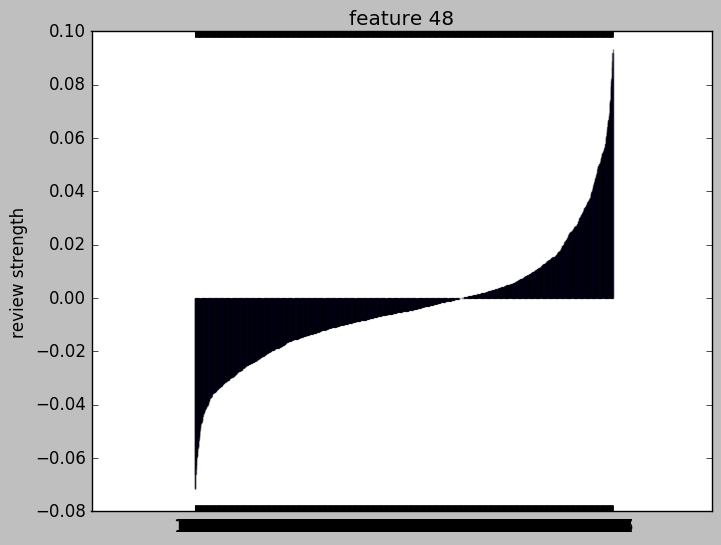

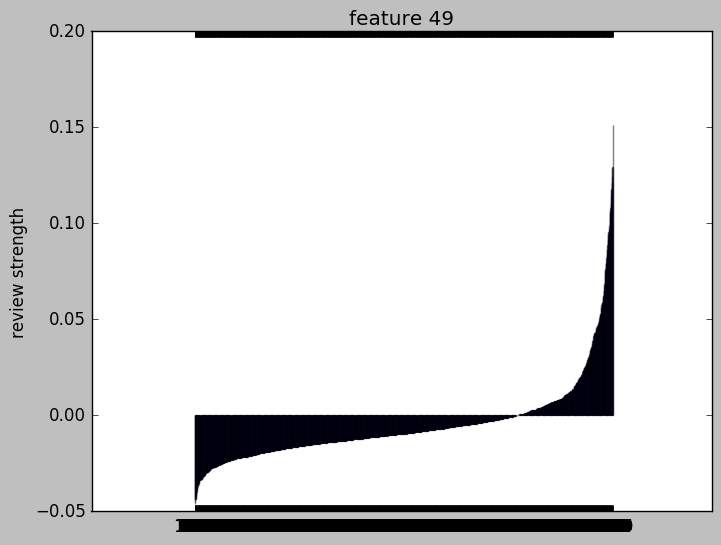

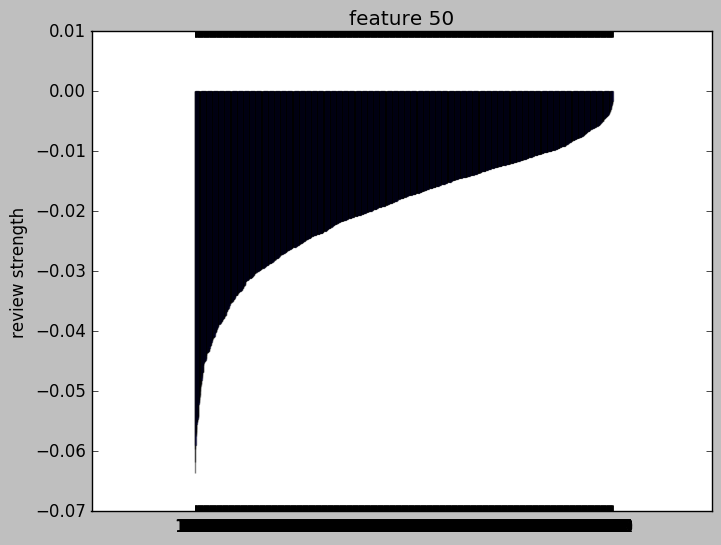

In [239]:
for i in range(48,51):
    tcdChart(i)

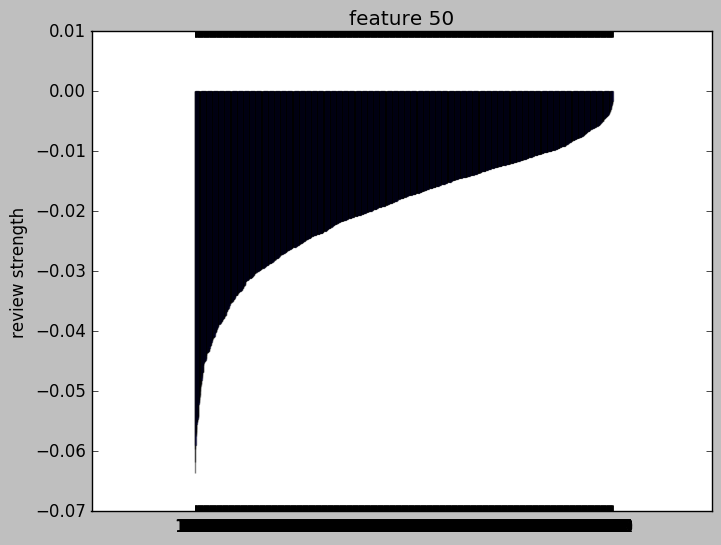

In [240]:
tcdChart(50)

In [241]:
bnp_fr.iloc[0]['reviewDescription']

u'poste int\xe9ressant avec beaucoup de formations. bonne entente avec les coll\xe9gues malgr\xe9 une surcharge de travail.'

### PCA on V

In [242]:
from sklearn.decomposition import PCA

In [243]:
pca = PCA(n_components=2)

In [244]:
#pca.fit(Vt)

In [245]:
Vp = pca.fit(Vt).transform(Vt)

In [246]:
pca.explained_variance_ratio_

array([ 0.02040816,  0.02040816])

### Scatter Plot

In [247]:
import matplotlib.pyplot as plt

In [248]:
colors = numpy.random.randn(m)

In [249]:
colors

array([-1.78138015,  2.20177422,  0.23081904, -0.41415921,  0.60774005,
        0.92394052,  0.99896282, -1.05600231, -1.79427135, -0.30279033,
        0.26852057,  0.87703848,  0.30018941,  0.79246364,  1.10454896,
       -0.48800596,  1.06296849,  1.620888  ,  2.54333481,  0.33059718,
        0.4132191 , -1.1286234 ,  0.02647968,  0.07686016, -1.60115481,
        1.29443685, -1.66756514, -0.2879144 , -0.76187513, -0.41810051,
       -1.90139425, -1.66999379,  0.57319502, -0.00605357,  0.71570263,
       -0.12662822, -0.62771124,  0.5187622 , -0.64936957, -0.19830405,
        0.78695989,  0.04136996,  0.11486362, -0.05957018, -0.39591626,
        0.01896261,  0.81982786,  1.12737214,  0.47367223, -0.62377733])

In [250]:
area = [crm[i] for i in range(m)]

In [251]:
area

[691,
 672,
 700,
 670,
 722,
 671,
 679,
 667,
 744,
 656,
 635,
 675,
 626,
 697,
 736,
 744,
 635,
 674,
 703,
 664,
 664,
 671,
 598,
 624,
 633,
 621,
 652,
 617,
 589,
 658,
 745,
 680,
 667,
 613,
 798,
 562,
 599,
 658,
 693,
 663,
 632,
 793,
 612,
 678,
 567,
 538,
 559,
 425,
 268,
 0]

In [263]:
plt.scatter(Vp[:,0], Vp[:,1], s=area, c=numpy.random.randn(m))

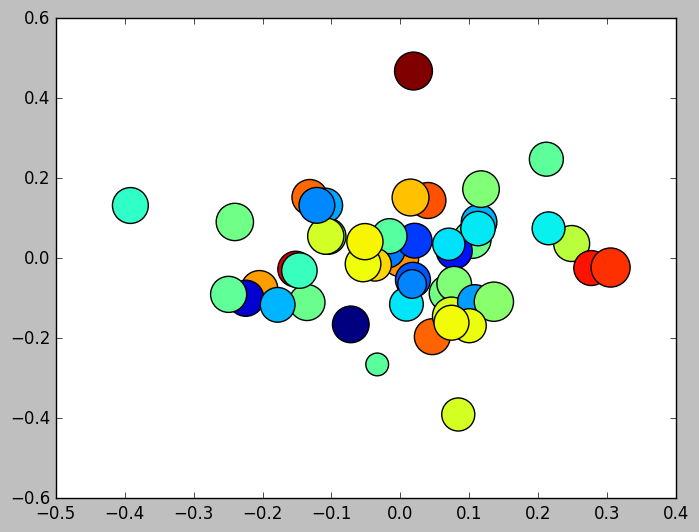

In [264]:
plt.show()

In [258]:
import plotly.plotly as py
import plotly.graph_objs as go

In [259]:
trace = go.Scatter(
    x = Vp[:,0],
    y = Vp[:,1],
    mode = 'markers',
    marker = dict(size= area, color = numpy.random.randn(50), colorscale='Viridis', showscale=True),
    text= range(1,51)
)

In [260]:
data = [trace]

In [261]:
py.iplot(data, filename='basic-scatter')

### Top strongest terms and reviews associated to a singular value

In [253]:
def top_rc(ind):
    sortedTerms = featureTermsSorted(list(V[:,ind-1]))
    #print sortedTerms
    sortedReviews = featureReviewsSorted(U[:,ind-1])
    d={}
    d['topReviews'] = [bnp_fr.iloc[t[0]]['reviewDescription'] for t in sortedReviews[-10:]]
    d['topTerms'] =  [t[0] for t in sortedTerms[-15:]]
    return d

In [262]:
def printTopRc(ind):
    d = top_rc(ind)
    print 'Topic N° :' + str(ind)
    print 'Topic Size : ' + str(crm[ind-1])
    print '\n\n'
    print '----------- 10 Top Reviews'
    for i in range(10):
        print d['topReviews'][9-i]
        print '\n\n'
    print '----------- 15 Top Terms'
    for i in range(15):
        print d['topTerms'][14-i]
    print '\n\n'

In [255]:
for i in range(51):
    printTopRc(50-i)

Topic N° :50
Topic Size : 0



----------- 10 Top Reviews
Nul ! j'ai rarement connue une gestion du personnel aussi catastrophique, aucun respect pour le salarié



tache simple mais trop réguliere,réaprovisionnement de marchandises



C’était a celui qui ferais le plus de dénonciation aux supérieurs hiérarchique



appel entrant/sortant,documentation,archivage,classer documents/ dossiers,utilisation word, excel



recherche de panne, changement de composant défectueux, test



- Rémunération très variable, non orientée par le résultat,- Maturité des acheteurs sont très variables



flexible, à mon rythme et organisée moi-même comme je le souhaite.



Strong contract development environment. Very progressive in technological frontiers. Excellent environment for enterprise driven and competitive job climbers



Exellent job to acquiere experience and professional challenges.



etre nourrice a domicile il y a des avantages car on ne bouge de c hez nous



----------- 15 Top Terms
capita

KeyError: -1

## Visualization with Bokeh

In [ ]:
print str(xyvalues['terms'][1].encode('utf-8'))

### LSA Clustering

In [ ]:
lsa_tfidf = numpy.dot(U,numpy.dot(sd,Vt))

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 20

km = KMeans(n_clusters=num_clusters)

km.fit(lsa_tfidf)

clusters = km.labels_.tolist()

In [ ]:
lsa_tfidf.shape

### BI/Tri-gram LDA

In [ ]:
from gensim import corpora, models, similarities
from textblob import TextBlob

In [ ]:
blob = TextBlob(bnp_fr['review'][0])

In [ ]:
blob = TextBlob(bnp_fr['review'][0])
grams = blob.ngrams(n=1)
grams3 = blob.ngrams(n=3)
grams2 = blob.ngrams(n=2)

In [ ]:
grams

In [ ]:
" ".join(list(grams3[0]))

In [ ]:
def n_grams(row):
    blob = TextBlob(row['review'])
    grams = blob.ngrams(n=3) + blob.ngrams(n=2)
    l = [" ".join(list(w)) for w in grams ]
    return l + row['review_lemmas']

In [ ]:
n_grams(bnp_fr['review'][0], bnp_fr['review_lemmas'][0])

In [ ]:
bnp_fr['bi3grams'] = bnp_fr.apply(lambda row : n_grams(row), axis=1)

In [ ]:
bnp_fr['bi3grams'][1]

In [ ]:
id2word = corpora.Dictionary(bnp_fr['bi3grams'])

In [ ]:
id2word.token2id

In [ ]:
corpus = [id2word.doc2bow(text) for text in bnp_fr['bi3grams']]

In [ ]:
topics_number = 20

In [ ]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=topics_number, passes=300)

In [ ]:
lda.top_topics(corpus, num_words=10)

In [ ]:
import pyLDAvis.gensim

pyLDAvis.gensim.prepare(lda, corpus, dictionary)

In [ ]:
proj = lda[id2word.doc2bow(bnp_fr['review'])]

In [ ]:
batch_lda = models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, update_every=1, num_topics=topics_number, passes=300)

In [ ]:
batch_lda.top_topics(corpus, num_words=10)

#### LDA topics' size

In [ ]:
bnp_fr['lda_projection']=bnp_fr['review_lemmas'].apply(lambda x : dict(lda[id2word.doc2bow(x)]))
bnp_fr['topics_id'] = bnp_fr['lda_projection'].apply(lambda x : x.keys())
bnp_fr['topics_number'] = bnp_fr['topics_id'].apply(len)

In [ ]:
bnp_fr['topics_id'] 

In [ ]:
topics_id = {}

In [ ]:
for i in range(0,topics_number):
    topics_id[i] = 0

In [ ]:
def topics_count(l):
    for key in topics_id.keys() :
        if key in l :
            topics_id[key]=topics_id[key]+1

In [ ]:
bnp_fr['topics_id'].apply(topics_count)

In [ ]:
topics_id #Keys are topics' IDs and value are number of reviews corresponding to the topic